In [2]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dados = pd.read_csv("Anatel.csv")

linhas = dados.index
colunas = dados.columns

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
#### Note #####

Estados = dados["ESTADO"].unique()
Operadoras = dados["OPERADORA"].unique()

In [3]:
##Reshape Data

#Dados de Solicitação de Atendimento Telefônico, Online e outro
A_2_Integrate = list()

for i in linhas:
        if  dados.loc[i , "A1_4"] == 97:
            A_2_Integrate.append(0)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(7)
        elif dados.loc[i, "A1_1"] == 1 and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(3)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(1)
        elif dados.loc[i, "A1_1"] == 1 and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(5)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and np.isnan(dados.loc[i, "A1_3"]):
            A_2_Integrate.append(2)
        elif np.isnan(dados.loc[i, "A1_1"]) and np.isnan(dados.loc[i, "A1_2"]) and dados.loc[i, "A1_3"] == 3:
            A_2_Integrate.append(4)
        elif np.isnan(dados.loc[i, "A1_1"]) and dados.loc[i, "A1_2"] == 2 and dados.loc[i, "A1_3"] == 3:
           A_2_Integrate.append(6)



In [13]:
##Data Copy to plot HeatMap
Data_Reshaped = dados.copy()
Data_Reshaped.insert(26, "A_2_Integrate", A_2_Integrate)

for number, i in enumerate(Estados):
    Data_Reshaped.loc[(Data_Reshaped.ESTADO == i),'ESTADO']=number

for number, i in enumerate(Operadoras):
    Data_Reshaped.loc[(Data_Reshaped.OPERADORA == i),'OPERADORA']=number

##Removing Data
Data_Reshaped.drop("Q1", inplace= True, axis = 1)
Data_Reshaped.drop("Q2_1", inplace= True, axis = 1)
Data_Reshaped.drop("Q2_2", inplace= True, axis = 1)
Data_Reshaped.drop("Q3", inplace= True, axis = 1)
Data_Reshaped.drop("Q4", inplace= True, axis = 1)
Data_Reshaped.drop("Q6", inplace= True, axis = 1)
Data_Reshaped.drop("A1_1", inplace= True, axis = 1)
Data_Reshaped.drop("A1_2", inplace= True, axis = 1)
Data_Reshaped.drop("A1_3", inplace= True, axis = 1)
Data_Reshaped.drop("A1_4", inplace= True, axis = 1)
Data_Reshaped.drop("IDTNS", inplace= True, axis = 1)
Data_Reshaped.drop("TIPO", inplace= True, axis = 1)
Data_Reshaped.drop("DATA", inplace= True, axis = 1)
Data_Reshaped.drop("PESO", inplace= True, axis = 1)
Data_Reshaped.drop("COD_IBGE", inplace= True, axis = 1)


[Text(0, 0.5, 'ANO_BASE'),
 Text(0, 1.5, 'Q2'),
 Text(0, 2.5, 'Q5'),
 Text(0, 3.5, 'Q7'),
 Text(0, 4.5, 'Q7a'),
 Text(0, 5.5, 'Q8'),
 Text(0, 6.5, 'J1'),
 Text(0, 7.5, 'B1_1'),
 Text(0, 8.5, 'B1_2'),
 Text(0, 9.5, 'C1_1'),
 Text(0, 10.5, 'C1_2'),
 Text(0, 11.5, 'C1_3'),
 Text(0, 12.5, 'D1_1'),
 Text(0, 13.5, 'D1_2'),
 Text(0, 14.5, 'A_2_Integrate'),
 Text(0, 15.5, 'A2_1'),
 Text(0, 16.5, 'A2_2'),
 Text(0, 17.5, 'A2_3'),
 Text(0, 18.5, 'A3'),
 Text(0, 19.5, 'A4'),
 Text(0, 20.5, 'E1'),
 Text(0, 21.5, 'E2'),
 Text(0, 22.5, 'E3'),
 Text(0, 23.5, 'E4'),
 Text(0, 24.5, 'E5'),
 Text(0, 25.5, 'E6'),
 Text(0, 26.5, 'E7'),
 Text(0, 27.5, 'E8'),
 Text(0, 28.5, 'F1'),
 Text(0, 29.5, 'F2_1'),
 Text(0, 30.5, 'F2_2'),
 Text(0, 31.5, 'F2_3'),
 Text(0, 32.5, 'F3'),
 Text(0, 33.5, 'F4_1'),
 Text(0, 34.5, 'F4_2'),
 Text(0, 35.5, 'F4_3'),
 Text(0, 36.5, 'G1'),
 Text(0, 37.5, 'G2_1'),
 Text(0, 38.5, 'G2_2'),
 Text(0, 39.5, 'G2_3'),
 Text(0, 40.5, 'H1'),
 Text(0, 41.5, 'H2'),
 Text(0, 42.5, 'H2a'),
 Text(0

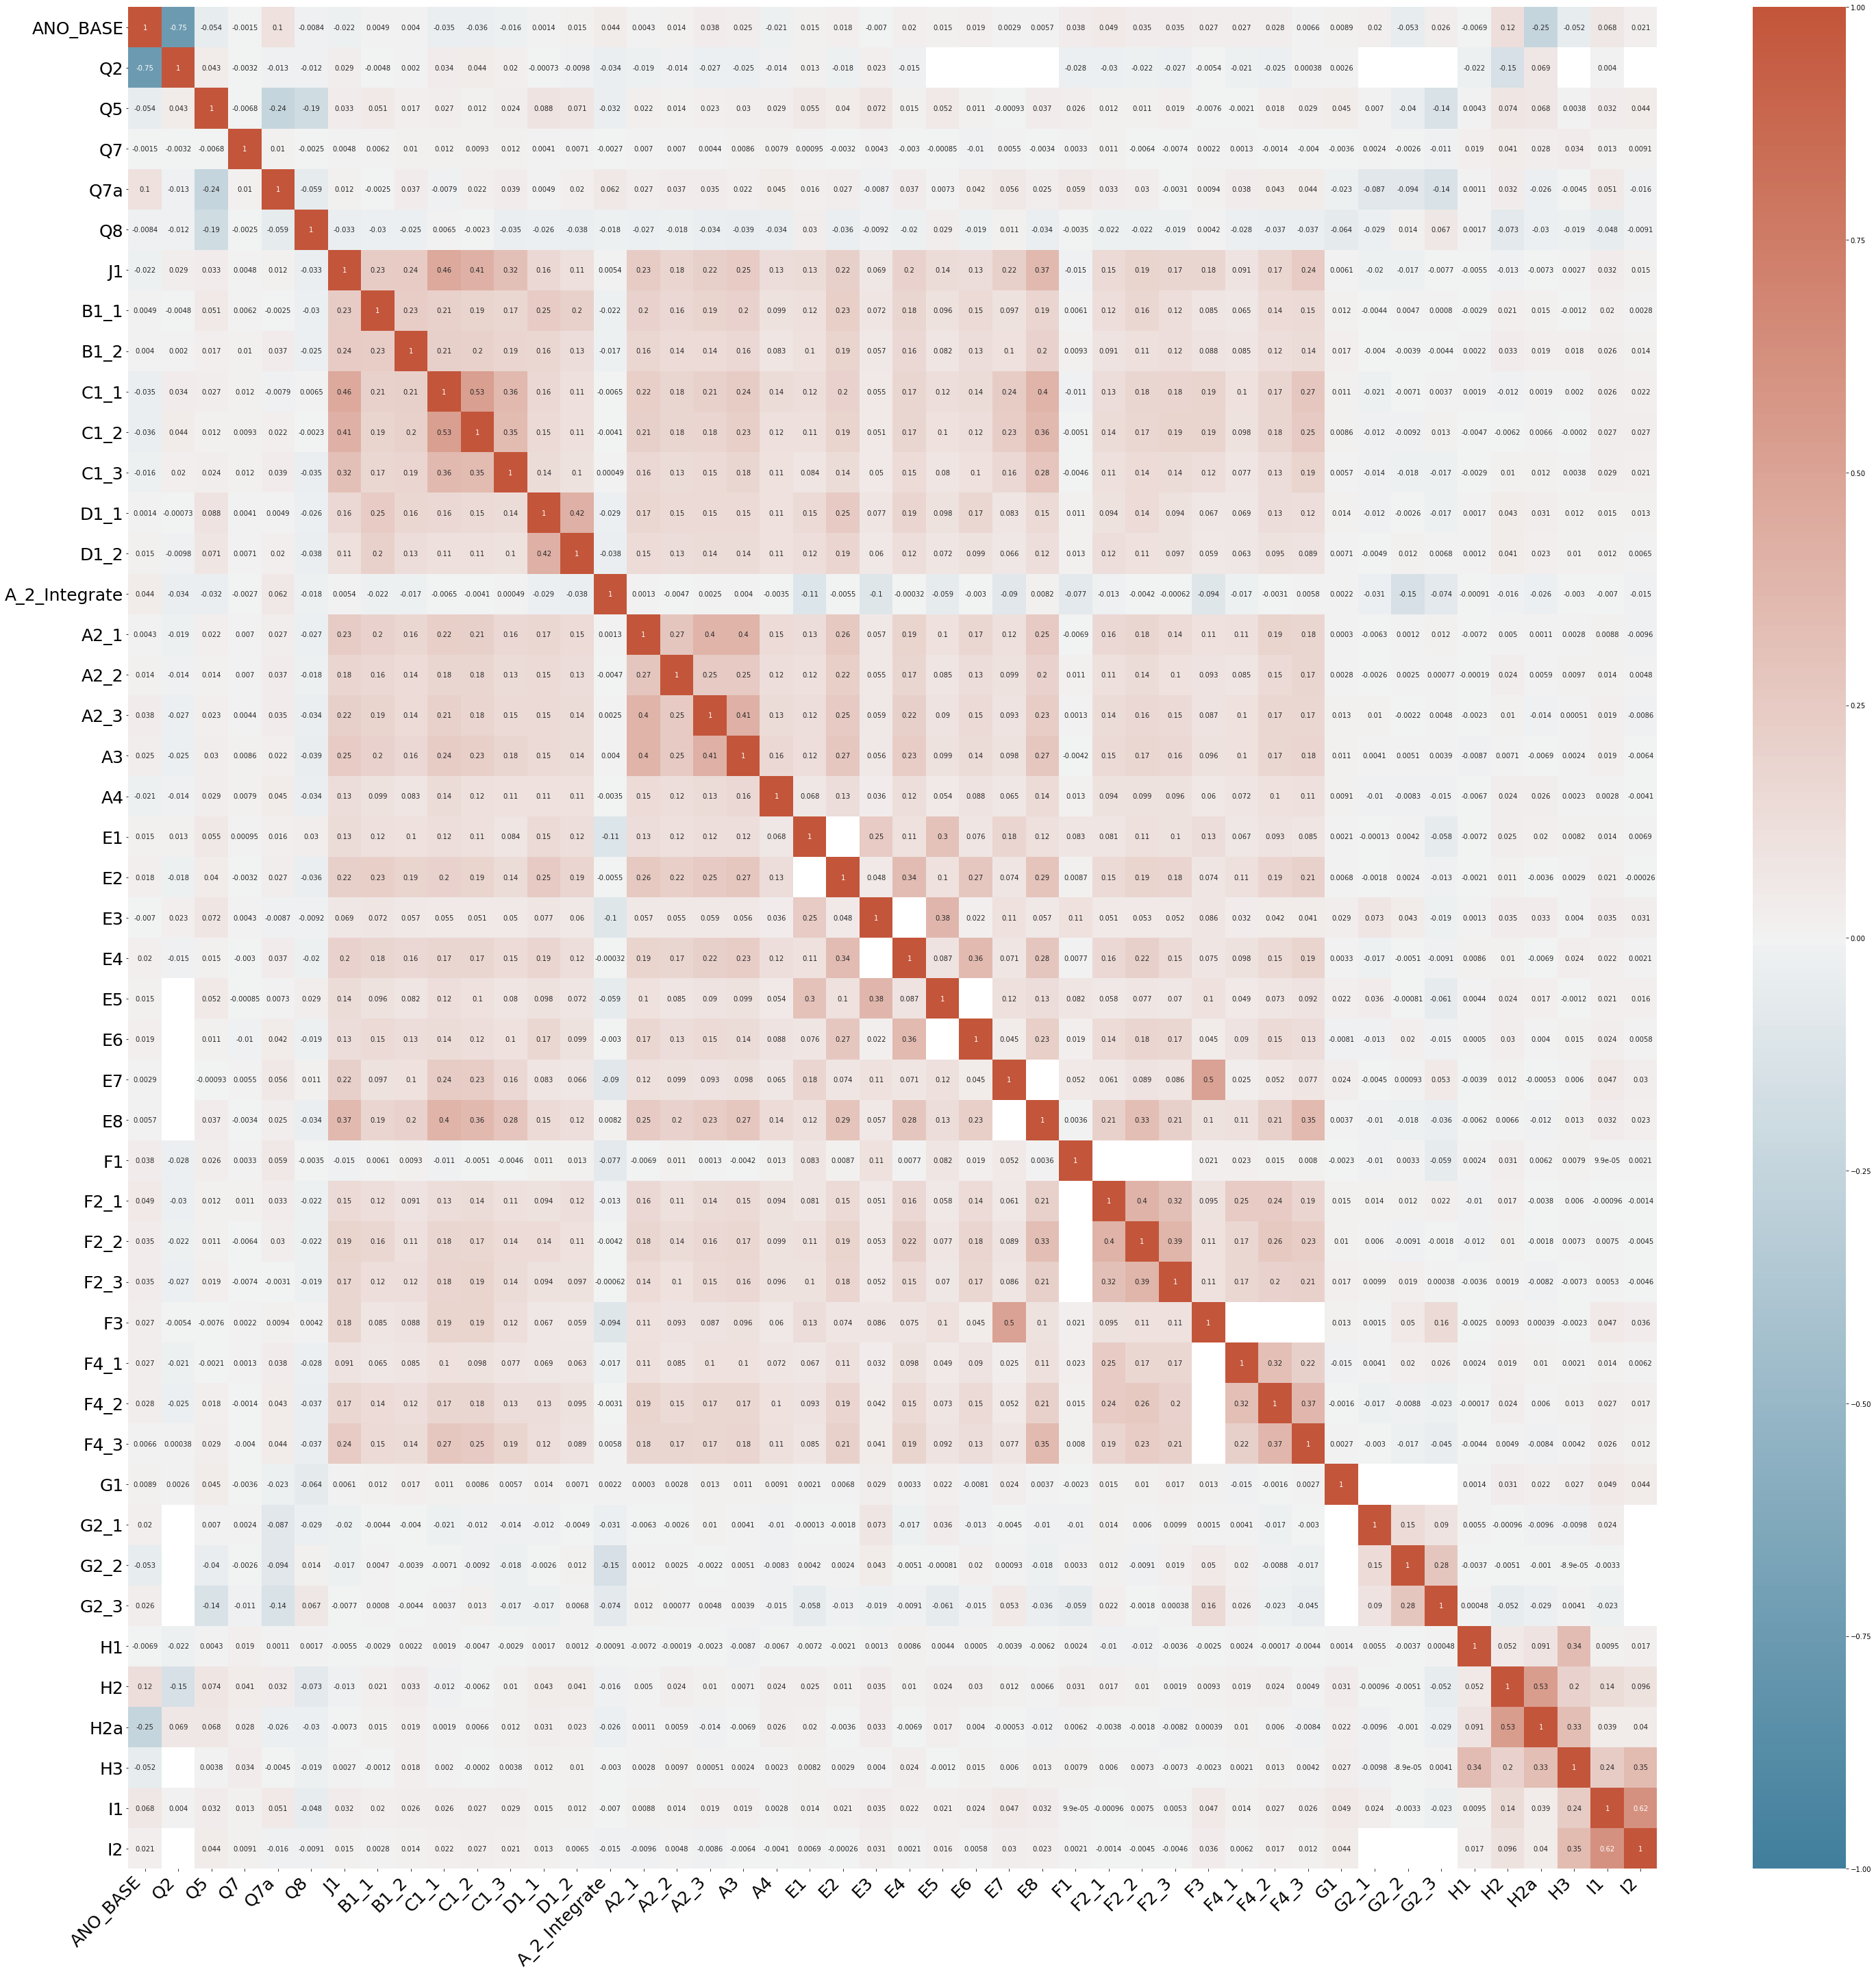

In [22]:
##HeatMapPlot

corr_matrix = Data_Reshaped.corr()
f, ax = plt.subplots(figsize=(50, 50))

#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap=cmap)
ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 25,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    size = 25
)


In [ ]:
##Scatter Plot

